## LGBM & XGBM

In [85]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train=pd.read_csv('Titanic_train.csv')
df_test=pd.read_csv('Titanic_test.csv')

In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
##Check for missing values.
print("Missing values in training data:")
print(df_train.isnull().sum())

print("Missing values in testing data:")
print(df_test.isnull().sum())

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in testing data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
df_train['Sex']=df_train['Sex'].astype('category')
df_train['Sex']=df_train['Sex'].cat.codes

In [9]:
df_test['Sex']=df_test['Sex'].astype('category')
df_test['Sex']=df_test['Sex'].cat.codes

In [10]:
##Impute missing values.

imputer = SimpleImputer(strategy='median')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])

In [11]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), int8(1), object(4)
memory usage: 33.2+ KB


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


In [14]:
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

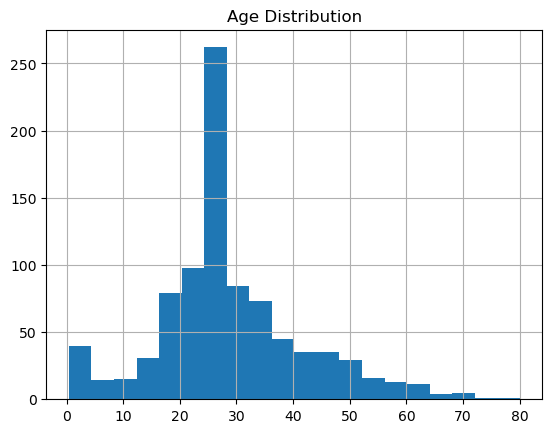

In [15]:
# Histogram
df_train['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

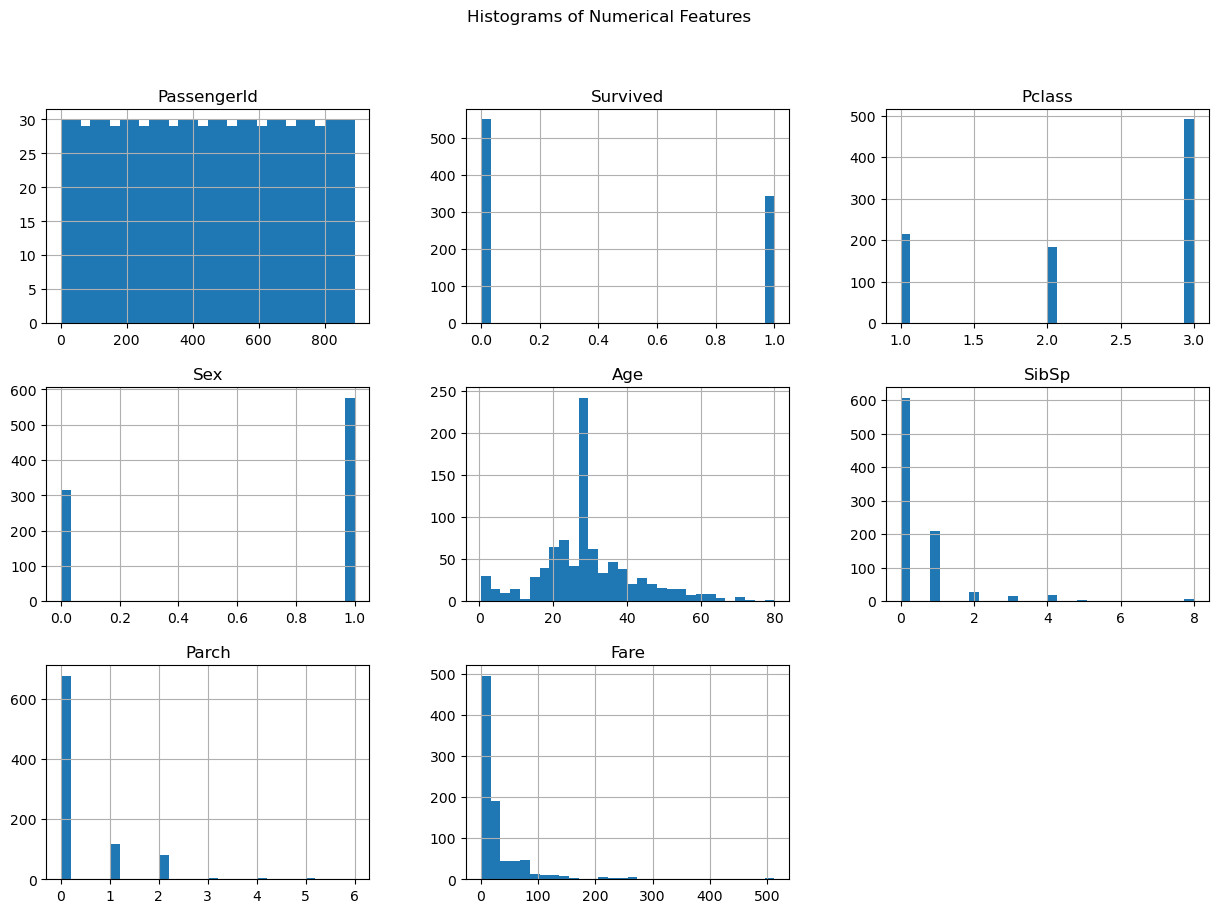

In [16]:
#histograms of every columns 
df_train.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

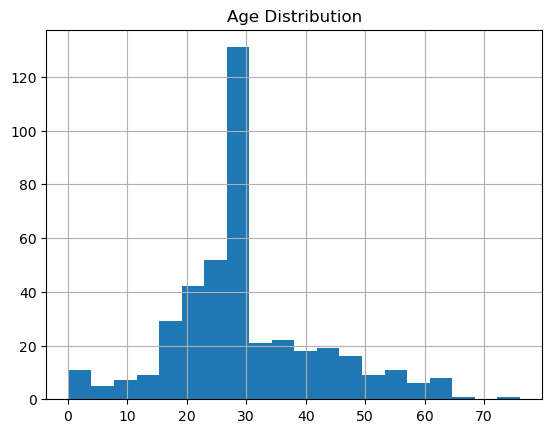

In [17]:
df_test['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

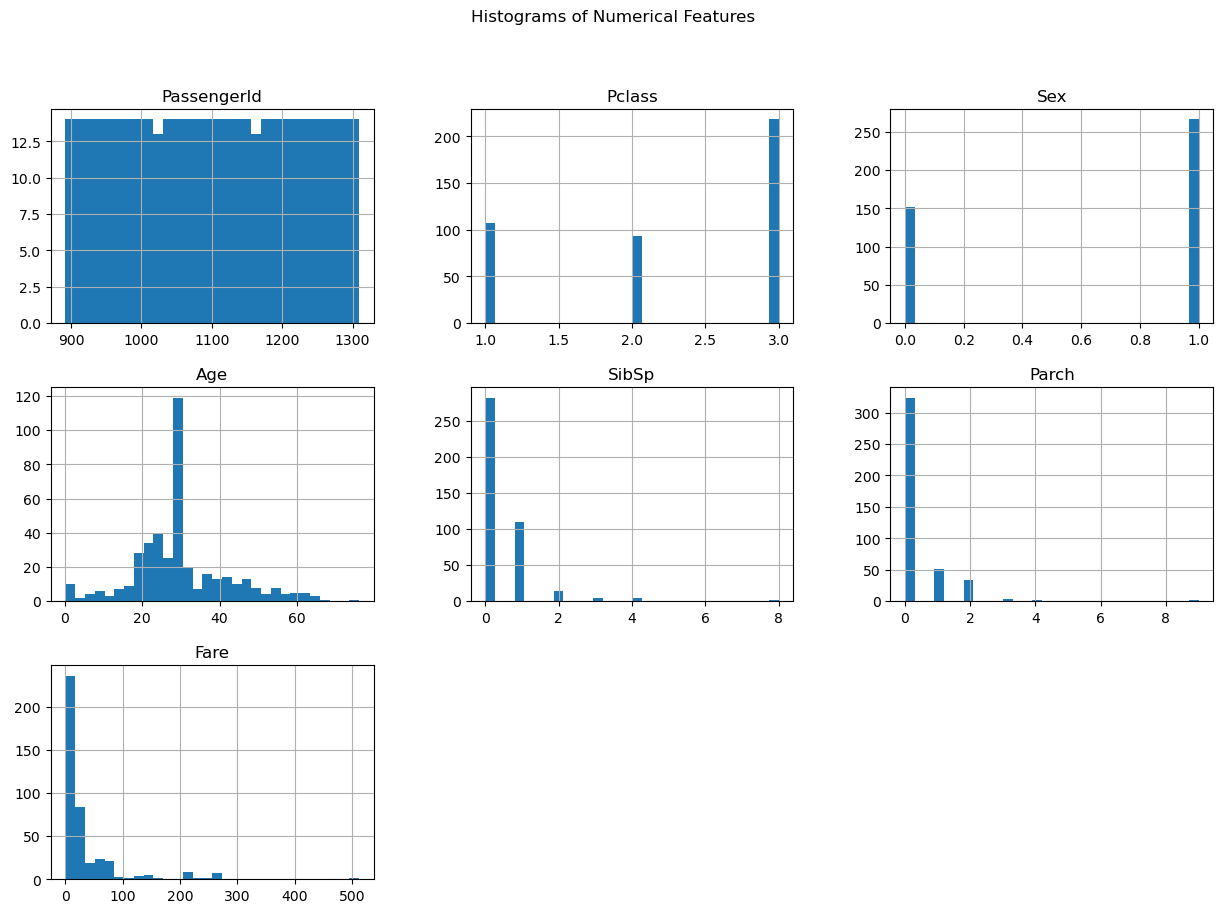

In [18]:
df_test.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

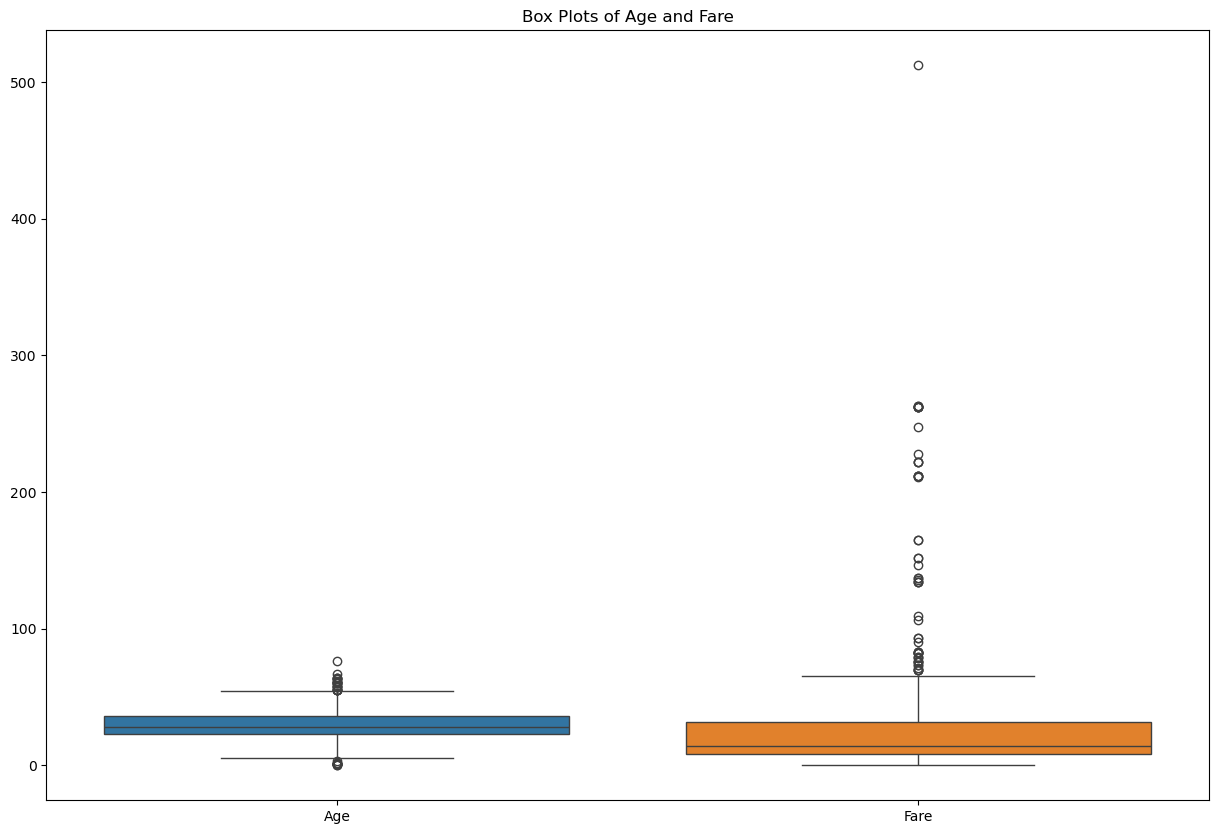

In [19]:
# Box plots:

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_test[['Age', 'Fare']])
plt.title('Box Plots of Age and Fare')
plt.show()

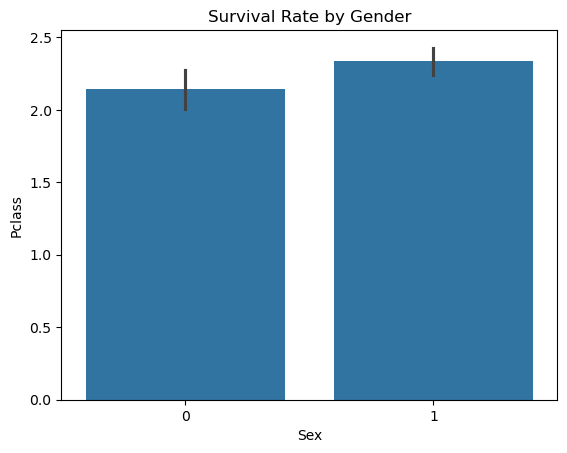

In [21]:
## Bar plot
sns.barplot(x='Sex', y='Pclass', data=df_test)
plt.title('Survival Rate by Gender')
plt.show()

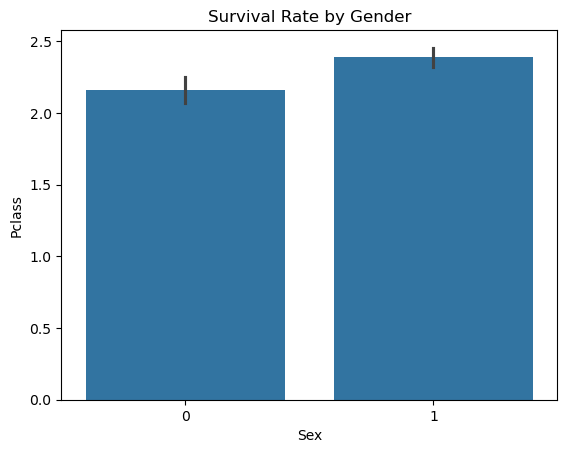

In [22]:
sns.barplot(x='Sex', y='Pclass', data=df_train)
plt.title('Survival Rate by Gender')
plt.show()

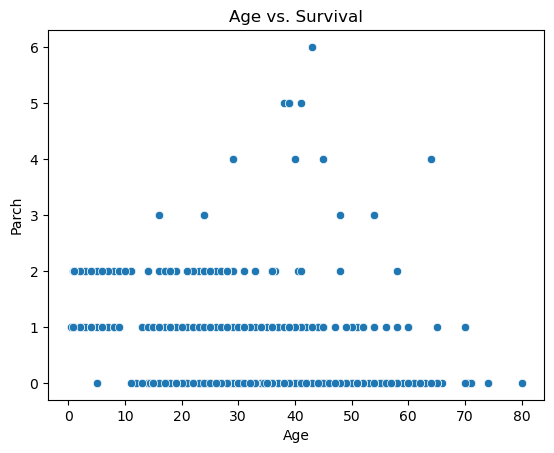

In [23]:
sns.scatterplot(x='Age', y='Parch', data=df_train)
plt.title('Age vs. Survival')
plt.show()

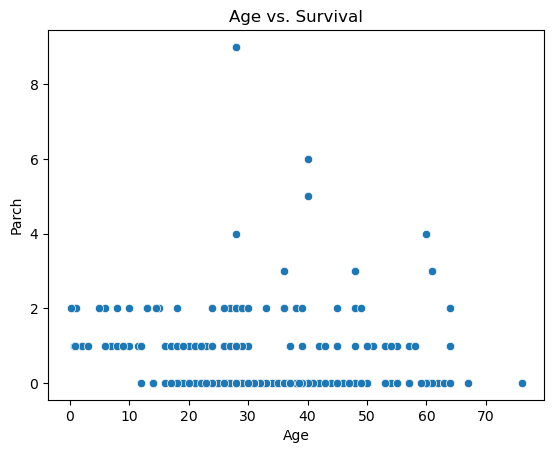

In [24]:
sns.scatterplot(x='Age', y='Parch', data=df_test)
plt.title('Age vs. Survival')
plt.show()

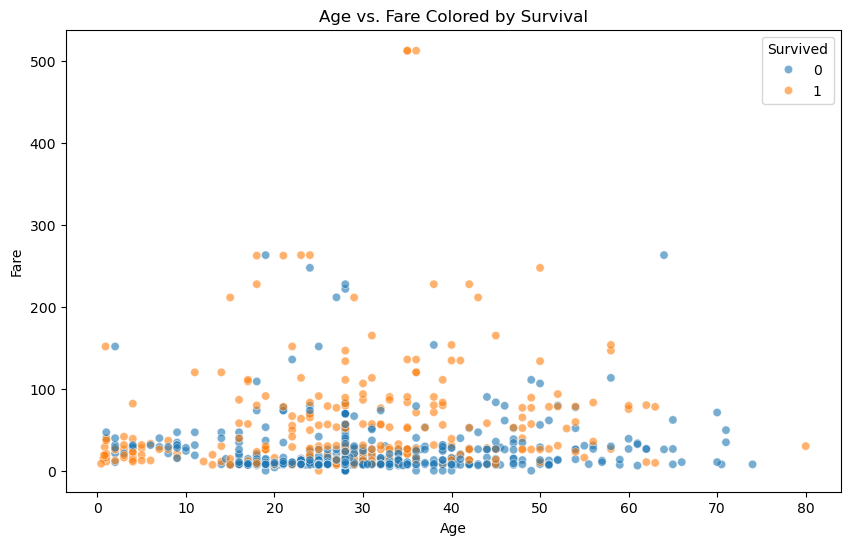

In [25]:
# Scatter plot for Age vs. Fare colored by survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train, alpha=0.6)
plt.title('Age vs. Fare Colored by Survival')
plt.show()

### Encode categorical variables using label encoding. 

In [91]:
le = LabelEncoder()
le

LabelEncoder()

In [93]:
df_train["Sex"] = le.fit_transform(df_train["Sex"])
df_train["Embarked"] = le.fit_transform(df_train["Embarked"])  # Ensure 'Embarked' is numeric

In [95]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [97]:
feature= df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
target=df_train['Survived']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [103]:
pip install lightgbm

In [104]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [131]:

import lightgbm as lgb
from xgboost import XGBClassifier

In [107]:
lgb_train = lgb.Dataset(x_train, y_train)

In [108]:
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

In [113]:
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)

In [121]:
y_pred_lgb = lgb_model.predict(x_test)
y_pred_lgb_binary = [1 if x >= 0.5 else 0 for x in y_pred_lgb]
print(y_pred_lgb)

[0.03021987 0.15151116 0.34098095 0.99890096 0.57780272 0.97574211
 0.75466666 0.00827102 0.5369878  0.98993116 0.74667709 0.13863886
 0.06559262 0.05442668 0.15195485 0.97421539 0.62943084 0.82377316
 0.34765679 0.01478809 0.00515345 0.84595622 0.30584224 0.03868728
 0.01058146 0.00343781 0.16114565 0.36046439 0.13673131 0.67279231
 0.03340173 0.64714202 0.76408948 0.69993075 0.19393431 0.19819253
 0.35141777 0.75466666 0.97880469 0.0078448  0.05283367 0.02796335
 0.01778363 0.16017989 0.18700266 0.10820009 0.3277114  0.00256247
 0.35023012 0.75550498 0.96920233 0.99561436 0.01279547 0.75929987
 0.03219061 0.98878355 0.19314571 0.92627016 0.99198704 0.59148935
 0.16545556 0.95158941 0.97490759 0.12549151 0.16017989 0.98519974
 0.07570696 0.25008032 0.14570202 0.98577141 0.88923671 0.93453704
 0.87164056 0.99455244 0.00986237 0.01107065 0.70544997 0.99305491
 0.99424195 0.69356911 0.00226862 0.98427285 0.99715355 0.16017989
 0.64972958 0.23836859 0.99750642 0.99777676 0.00556088 0.0191

In [119]:
print(y_pred_lgb_binary)

[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]


In [151]:
print("Accuracy:", accuracy_score(y_test, y_pred_lgb_binary))
print("Precision:", precision_score(y_test, y_pred_lgb_binary))
print("Recall:", recall_score(y_test, y_pred_lgb_binary))
print("F1 Score:", f1_score(y_test, y_pred_lgb_binary))

Accuracy: 0.8212290502793296
Precision: 0.7837837837837838
Recall: 0.7837837837837838
F1 Score: 0.7837837837837838


In [133]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [135]:
dtrain = xgb.DMatrix(x_train, label=y_train)

In [137]:
dtest = xgb.DMatrix(x_test, label=y_test)

In [139]:
xgb_params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',         # Evaluation metric
    'learning_rate': 0.1,              # Step size shrinkage
    'max_depth': 3,                    # Maximum depth of a tree
    'alpha': 10,                       # L1 regularization term
    'n_estimators': 100                # Number of trees
}

In [141]:
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [143]:
y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb_binary = [1 if x >= 0.5 else 0 for x in y_pred_xgb]

In [149]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_binary))
print("Precision:", precision_score(y_test, y_pred_xgb_binary))
print("Recall:", recall_score(y_test, y_pred_xgb_binary))
print("F1 Score:", f1_score(y_test, y_pred_xgb_binary))

Accuracy: 0.7932960893854749
Precision: 0.7936507936507936
Recall: 0.6756756756756757
F1 Score: 0.7299270072992701


### Comparative Analysis:

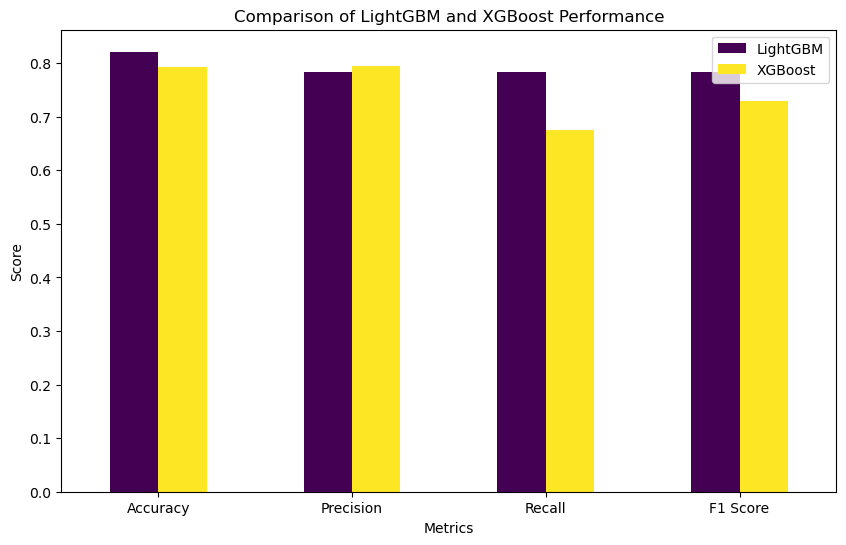

In [160]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lightgbm_scores = [
    accuracy_score(y_test, y_pred_lgb_binary),
    precision_score(y_test, y_pred_lgb_binary),
    recall_score(y_test, y_pred_lgb_binary),
    f1_score(y_test, y_pred_lgb_binary)]

xgboost_scores = [
    accuracy_score(y_test, y_pred_xgb_binary),
    precision_score(y_test, y_pred_xgb_binary),
    recall_score(y_test, y_pred_xgb_binary),
    f1_score(y_test, y_pred_xgb_binary)]

results_df = pd.DataFrame({
    'Metrics': metrics,
    'LightGBM': lightgbm_scores,
    'XGBoost': xgboost_scores})

results_df.set_index('Metrics').plot(kind='bar', figsize=(10, 6),colormap='viridis')
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

### analysis results